In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV


SEED = 0

In [4]:
#Loading data
data = pd.read_csv("creditcard.csv", header=0)
#data.head()

In [5]:
#Handle Duplicated values
print("Duplicates", data.duplicated().sum())
data = data.drop_duplicates()
print("Rows {}, Columns {}".format(data.shape[0], data.shape[1]))

Duplicates 1081
Rows 283726, Columns 31


In [6]:
x_data = data.drop(columns=["Class"])
y_data = data["Class"]
X_train, X_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.3, random_state=SEED )

In [10]:
#Bagging using Random forest

# Define the base classifier
base_clf = RandomForestClassifier()

# Define the bagging classifier
bagging_clf = BaggingClassifier(estimator=base_clf)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
}
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=2,verbose=3,n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.999 total time= 1.5min
[CV 2/2] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.999 total time= 1.6min
[CV 1/2] END max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.999 total time= 2.7min
[CV 2/2] END max_features=0.5, max_samples=1.0, n_estimators=10;, score=0.999 total time= 2.9min
[CV 1/2] END max_features=0.5, max_samples=0.5, n_estimators=50;, score=0.999 total time= 7.2min
[CV 2/2] END max_features=0.5, max_samples=0.5, n_estimators=50;, score=0.999 total time= 7.7min
[CV 1/2] END max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.999 total time= 2.2min
[CV 2/2] END max_features=1.0, max_samples=0.5, n_estimators=10;, score=0.999 total time= 2.4min
[CV 1/2] END max_features=0.5, max_samples=0.5, n_estimators=100;, score=0.999 total time=14.4min
[CV 1/2] END max_features=0.5, max_samples=1.0, n_estimators=50;,

In [11]:
# Define the base classifier
base_clf = RandomForestClassifier()

# Define the bagging classifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10,max_features=1.0,max_samples=1.0)

# Train the bagging classifier on the training data
bagging_clf.fit(X_train, y_train)

# Evaluate the bagging classifier on the test data
y_pred = bagging_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.73      0.82       129

    accuracy                           1.00     85118
   macro avg       0.97      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



Confusion matrix:
[[84982     7]
 [   35    94]]


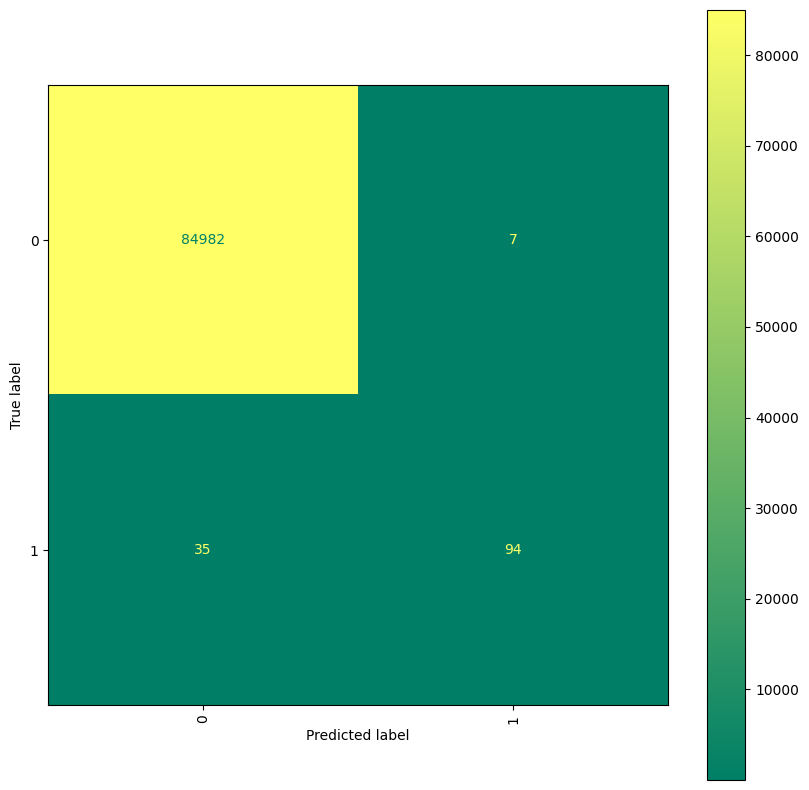

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=[0,1])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.show()